In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

In [3]:
path_folder = "/content/drive/MyDrive/strawberryDataset"
class_name = os.listdir(path_folder)
class_name

['Pickable', 'UnPickable']

In [4]:
path_folder = "/content/drive/MyDrive/strawberryDataset"
class_name = os.listdir(path_folder)
class_name.sort()
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (224, 224))

        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Pickable', 'UnPickable']
Loading Folder -- Pickable  The Count of Classes ==>  0
Loading Folder -- UnPickable  The Count of Classes ==>  1
---- Done ----------- 


In [5]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [6]:
print(data.shape)

(521, 224, 224, 3)


In [7]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0.])

In [8]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((416, 224, 224, 3), (416, 2), (105, 224, 224, 3), (105, 2))

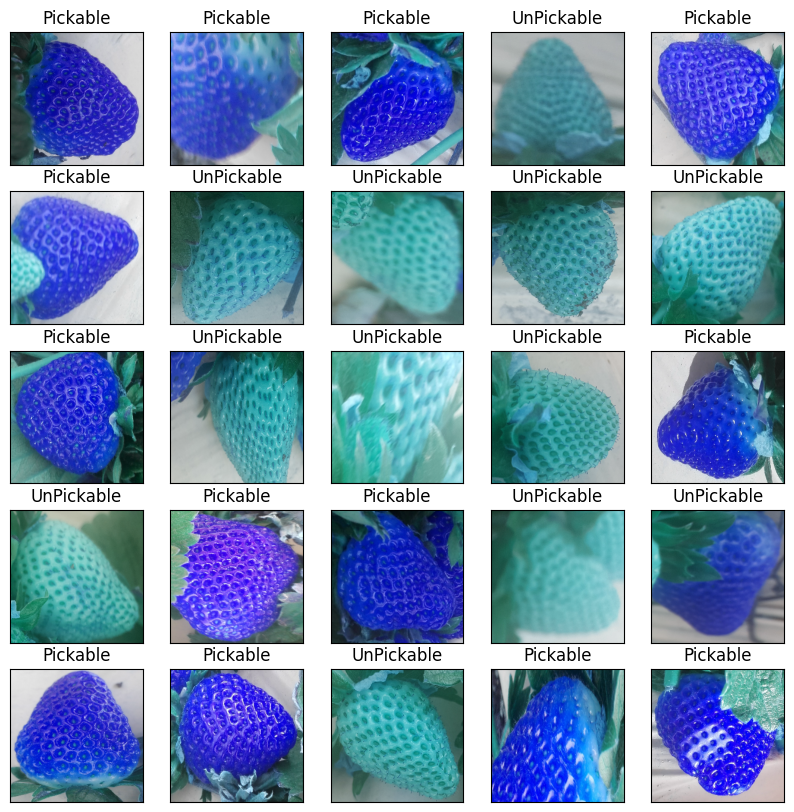

In [10]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [11]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(224, 224, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(len(class_name), activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 56, 56, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 28, 28, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,491,906 (24.76 MB)

 Trainable params: 6,491,906 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.7385 - loss: 0.4169 - val_accuracy: 0.9714 - val_loss: 0.0788
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9771 - loss: 0.0581 - val_accuracy: 0.9905 - val_loss: 0.0457
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9609 - loss: 0.0988 - val_accuracy: 0.9905 - val_loss: 0.0504
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9574 - loss: 0.1083 - val_accuracy: 0.9714 - val_loss: 0.0640
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9848 - loss: 0.0565 - val_accuracy: 0.9619 - val_loss: 0.0896
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9773 - loss: 0.0709 - val_accuracy: 0.9619 - val_loss: 0.0901
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9938 - loss: 0.0235 - val_accuracy: 0.9810 - val_loss: 0.0505
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9965 - loss: 0.0231 - val_accuracy: 0.9619 

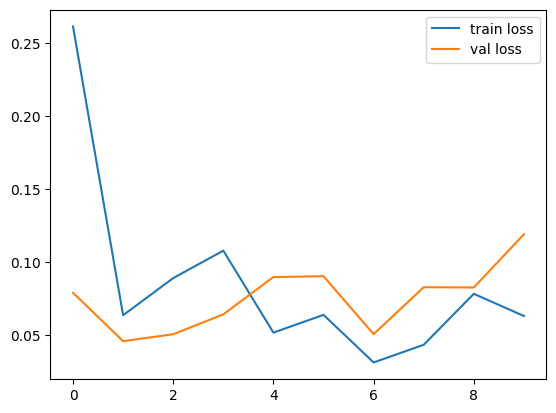

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

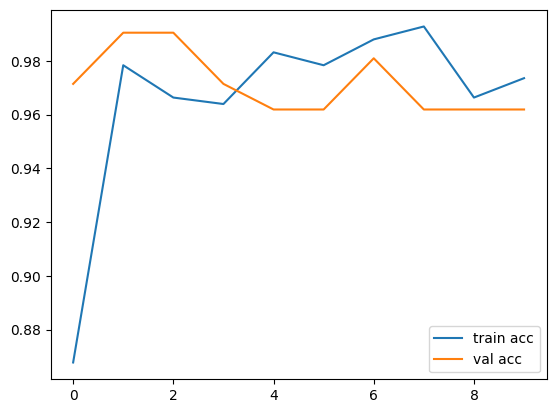

<Figure size 640x480 with 0 Axes>

In [14]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'model' is your trained model
y_pred_probabilities = model.predict(x_train)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels

# Assuming y_test is one-hot encoded
y_true = np.argmax(y_train, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print(classification_report(y_true, y_pred))



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       216
           1       1.00      0.96      0.98       200

    accuracy                           0.98       416
   macro avg       0.98      0.98      0.98       416
weighted avg       0.98      0.98      0.98       416



In [16]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'model' is your trained model
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels

# Assuming y_test is one-hot encoded
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print(classification_report(y_true, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        47
           1       1.00      0.93      0.96        58

    accuracy                           0.96       105
   macro avg       0.96      0.97      0.96       105
weighted avg       0.96      0.96      0.96       105



In [18]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from PIL import Image

# Custom dataset class
class CustomImageFolder(Dataset):
    def __init__(self, root_dir, transform):
        self.dataset = ImageFolder(root_dir, transform=transform)
        self.corrupted_idx = []

    def __getitem__(self, index):
        try:
            return self.dataset[index]
        except OSError:
            self.corrupted_idx.append(index)
            return None  # Return None for corrupted file

    def __len__(self):
        return len(self.dataset)

    def get_corrupted_files(self):
        return [self.dataset.imgs[i] for i in self.corrupted_idx]

# Custom collate function to filter out None values
def custom_collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)

# Data preprocessing
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom dataset
custom_dataset = CustomImageFolder('/content/drive/MyDrive/strawberryDataset', transform=transform)
train_size = int(0.8 * len(custom_dataset))
test_size = len(custom_dataset) - train_size
train_dataset, test_dataset = random_split(custom_dataset, [train_size, test_size])

# DataLoaders with custom collate function
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

# Model setup
alexnet = models.alexnet(pretrained=True)
num_classes = len(custom_dataset.dataset.classes)
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)

# Training the model
num_epochs = 15
for epoch in range(num_epochs):
    alexnet.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Testing the model
    alexnet.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = alexnet(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct / total} %')

print('Finished Training')

# Print corrupted files
corrupted_files = custom_dataset.get_corrupted_files()
print("Corrupted files:", corrupted_files)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 90.1MB/s]


Epoch 1, Loss: 0.15548973770525593
Accuracy of the network on the test images: 98.0952380952381 %
Epoch 2, Loss: 0.024394122131455403
Accuracy of the network on the test images: 96.19047619047619 %
Epoch 3, Loss: 0.011909698800501736
Accuracy of the network on the test images: 97.14285714285714 %
Epoch 4, Loss: 0.0036230164797906093
Accuracy of the network on the test images: 96.19047619047619 %
Epoch 5, Loss: 0.0032365976125779874
Accuracy of the network on the test images: 97.14285714285714 %
Epoch 6, Loss: 0.004415523129864596
Accuracy of the network on the test images: 97.14285714285714 %
Epoch 7, Loss: 0.0037410115666996436
Accuracy of the network on the test images: 97.14285714285714 %
Epoch 8, Loss: 0.002393530932539971
Accuracy of the network on the test images: 97.14285714285714 %
Epoch 9, Loss: 0.0008140329016004426
Accuracy of the network on the test images: 97.14285714285714 %
Epoch 10, Loss: 0.00240818017685412
Accuracy of the network on the test images: 97.14285714285714 

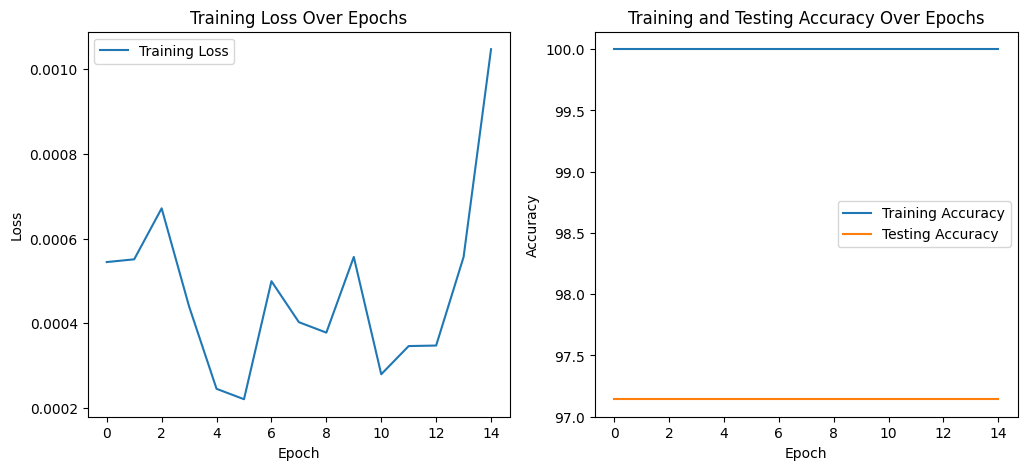

In [19]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
test_accuracies = []

# Train the model
for epoch in range(num_epochs):
    alexnet.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Test the model
    alexnet.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = alexnet(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()

plt.show()

In [20]:
torch.save(alexnet.state_dict(), '/content/drive/MyDrive/stawberry.pth')

torch.save(alexnet, 'retina.pth')

In [21]:
alexnet = models.alexnet()
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, len(class_name))
alexnet.load_state_dict(torch.load('/content/drive/MyDrive/stawberry.pth'))
alexnet.to(device)  # Move the model to the device

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [28]:
    from PIL import Image
    import torch
    import torchvision.transforms as transforms

    # Define your transformation pipeline
    transform = transforms.Compose([
        transforms.Resize((227, 227)),  # AlexNet uses 227x227 input size
        transforms.ToTensor(),
        # Normalization values for pretrained models are usually the means and stds of the ImageNet dataset.
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    def predict_single_image(image_path, model, transform, device):
        # Open the image file
        image = Image.open(image_path)

        # Convert to RGB if not already (assumes that the input image can have 1 or 3 channels)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Apply the transformations to the image
        image = transform(image)

        # Add a batch dimension since pytorch expects a batch, not a single image
        image = image.unsqueeze(0).to(device)

        # Set the model to evaluation mode
        model.eval()

        # No need to track gradients for validation, hence wrap in torch.no_grad()
        with torch.no_grad():
            outputs = model(image)
            _, predicted = torch.max(outputs, 1)

        # Get the index of the predicted class
        return predicted.item()

    # Make sure to define `alexnet`, `device`, and `dataset.classes` appropriately before calling this function
    # Example usage:
    image_path = '/content/drive/MyDrive/strawberryDataset/UnPickable/fresa_278.jpg'  # Replace with your image path
    predicted_class_index = predict_single_image(image_path, alexnet, transform, device)
    predicted_class = class_name[predicted_class_index]
    print(f'Predicted Class: {predicted_class}')


Predicted Class: UnPickable
